# Oqani et. al. 2025: Star Alignment > AnnData PreProcessing

## Environment Setup (230707)

Install software from pip, apt, and Github.  Load modules, configure workspace settings.

In [ ]:
# No editing of this code cell is required

# Environment Setup: verified working w/ Python 3.9.16 on 230316

# print python version to screen
!python --version

# pip install software
!pip install -q scanpy==1.9.3 leidenalg==0.8.10 harmonypy==0.0.9 scrublet==0.2.3
!wget -qc https://raw.githubusercontent.com/wagnerde/scTools-py/master/scTools_dew.py

# import python packages
import os, sys
import numpy as np
import pandas as pd
import scanpy as sc
import scTools_dew as dew
import warnings


# set some ScanPy settings
sc.set_figure_params(dpi=120, figsize=[4,4], fontsize=7)
sc.settings.verbosity = 0

Python 3.10.12
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.2/104.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 22.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.3 MB/s eta 0:00:00


## Download Star Count Matrices from Wynton

Clean up the library directory names:
```
cd /content/wynton/group/wagner/NIMBUS/FASTQ/230705_NovaSeq_PR/
mv maltepee-FB1 FB1
mv maltepee-FB2 FB2
mv maltepee-FB3 FB3
mv maltepee-IVF1 IVF1
mv maltepee-IVF2 IVF2
mv maltepee-IVF3 IVF3
cd /content/
```

## Load into AnnData


In [ ]:
input_path = '/content/wynton/group/wagner/NIMBUS/FASTQ/230705_NovaSeq_PR/'
library_ids = ['FB1','FB2','FB3','IVF1','IVF2','IVF3']

adata_dict = dew.load_starsolo(library_ids, input_path, filt_path='filtered')

In [ ]:
adata_dict

{'FB1': AnnData object with n_obs × n_vars = 14769 × 32285
     obs: 'library_id'
     var: 'gene_ids', 'feature_types'
     layers: 'unspliced', 'spliced', 'ambiguous',
 'FB2': AnnData object with n_obs × n_vars = 8585 × 32285
     obs: 'library_id'
     var: 'gene_ids', 'feature_types'
     layers: 'unspliced', 'spliced', 'ambiguous',
 'FB3': AnnData object with n_obs × n_vars = 6822 × 32285
     obs: 'library_id'
     var: 'gene_ids', 'feature_types'
     layers: 'unspliced', 'spliced', 'ambiguous',
 'IVF1': AnnData object with n_obs × n_vars = 11486 × 32285
     obs: 'library_id'
     var: 'gene_ids', 'feature_types'
     layers: 'unspliced', 'spliced', 'ambiguous',
 'IVF2': AnnData object with n_obs × n_vars = 8281 × 32285
     obs: 'library_id'
     var: 'gene_ids', 'feature_types'
     layers: 'unspliced', 'spliced', 'ambiguous',
 'IVF3': AnnData object with n_obs × n_vars = 9716 × 32285
     obs: 'library_id'
     var: 'gene_ids', 'feature_types'
     layers: 'unspliced', 'spli

## Perform Quality Filtering

### Perform Cell Barcode Filtering
Uses a weighted histogram, rather than a cumulative histogram, to estimate the lower bound transcripts (UMIs) per barcode threshold.

FB1


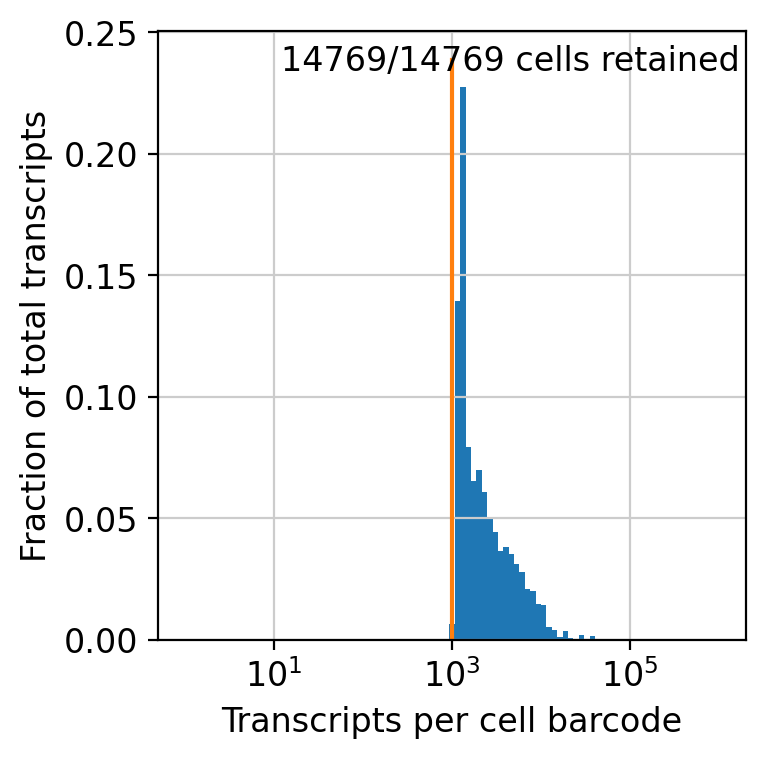

Barcode Filtering  (14769/14769 cells retained)

FB2


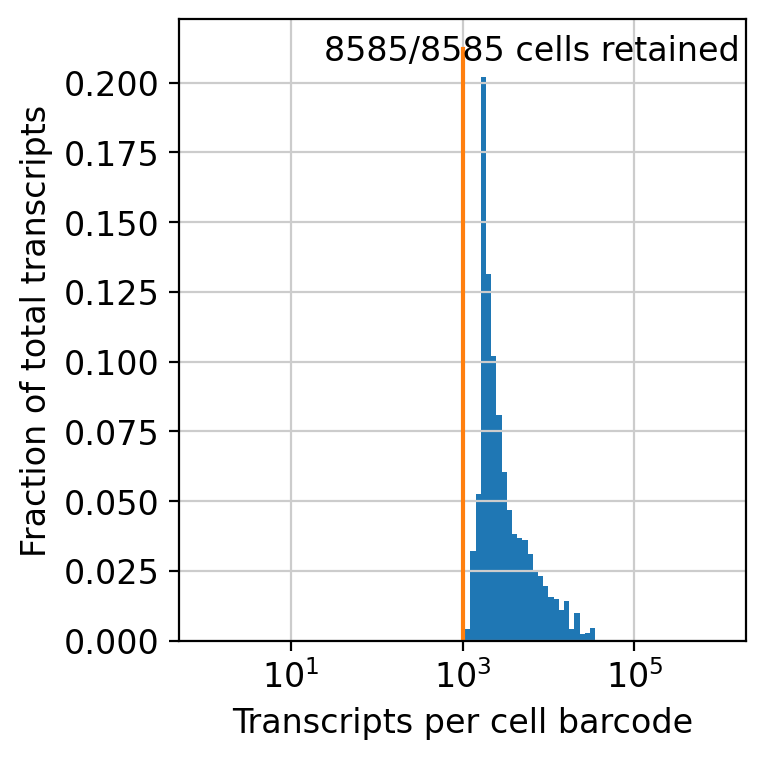

Barcode Filtering  (8585/8585 cells retained)

FB3


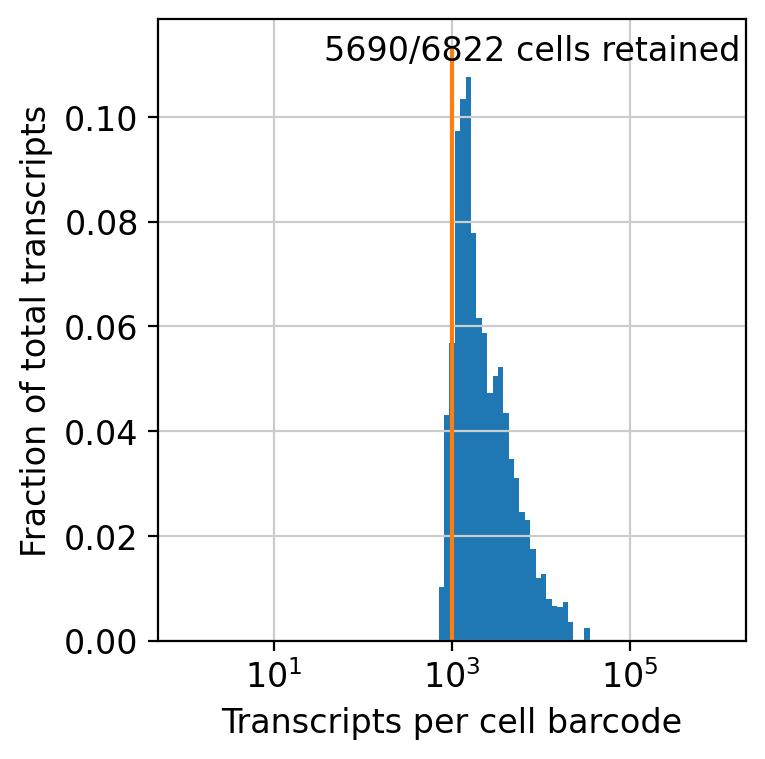

Barcode Filtering  (5690/6822 cells retained)

IVF1


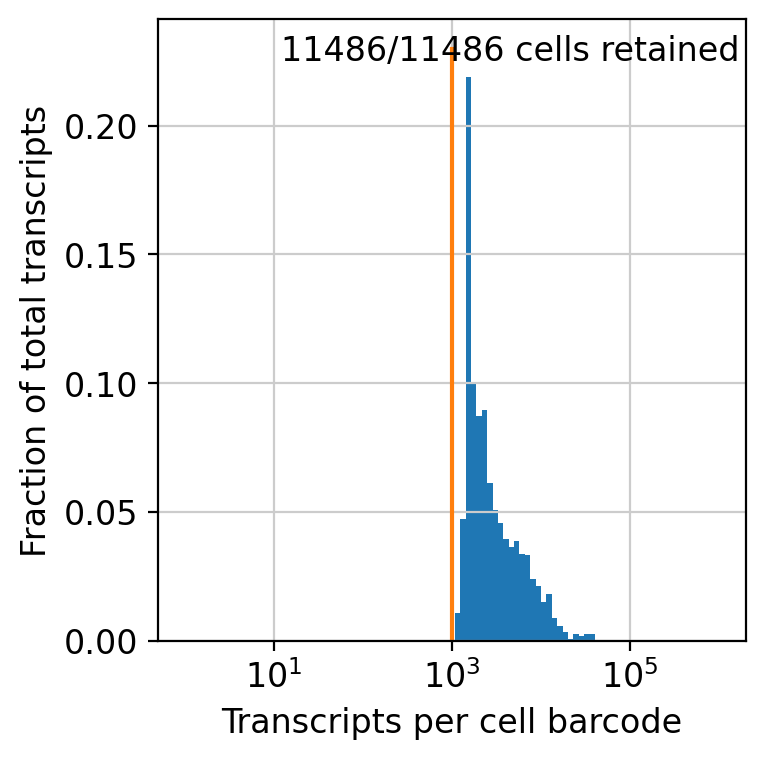

Barcode Filtering  (11486/11486 cells retained)

IVF2


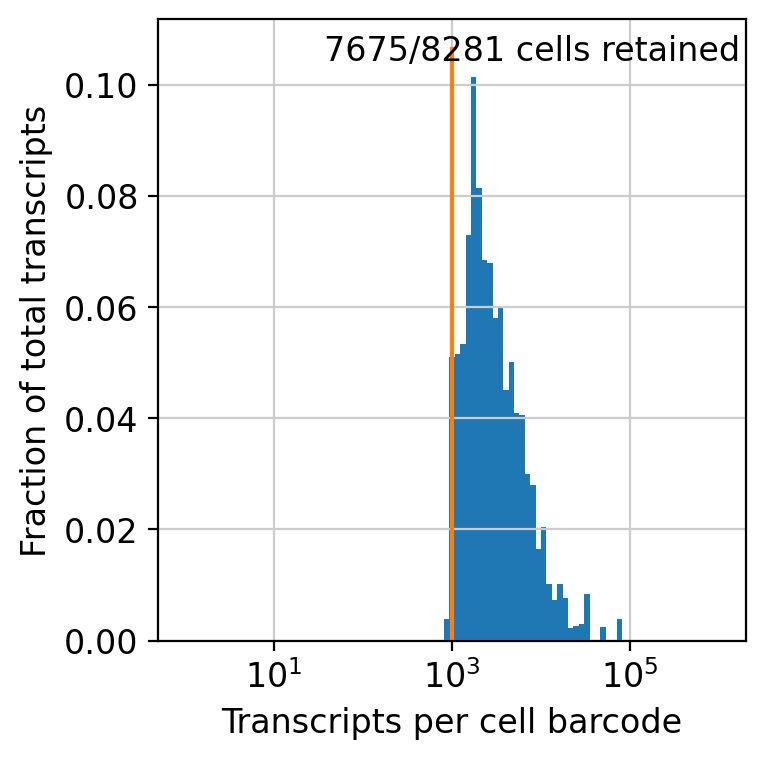

Barcode Filtering  (7675/8281 cells retained)

IVF3


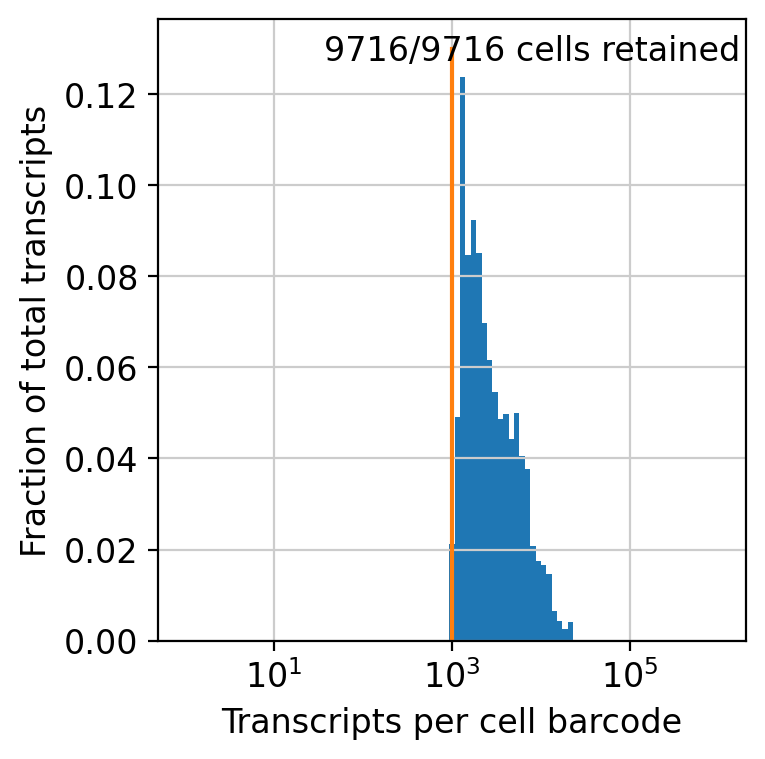

Barcode Filtering  (9716/9716 cells retained)



In [ ]:
ab_threshold = [1000]
ab_filter_flag = True

for n, lib in enumerate(library_ids):
  print(lib)
  dew.filter_abundant_barcodes(adata_dict[lib], filter_cells=ab_filter_flag, threshold=ab_threshold)


### Perform Mitochondrial Filtering

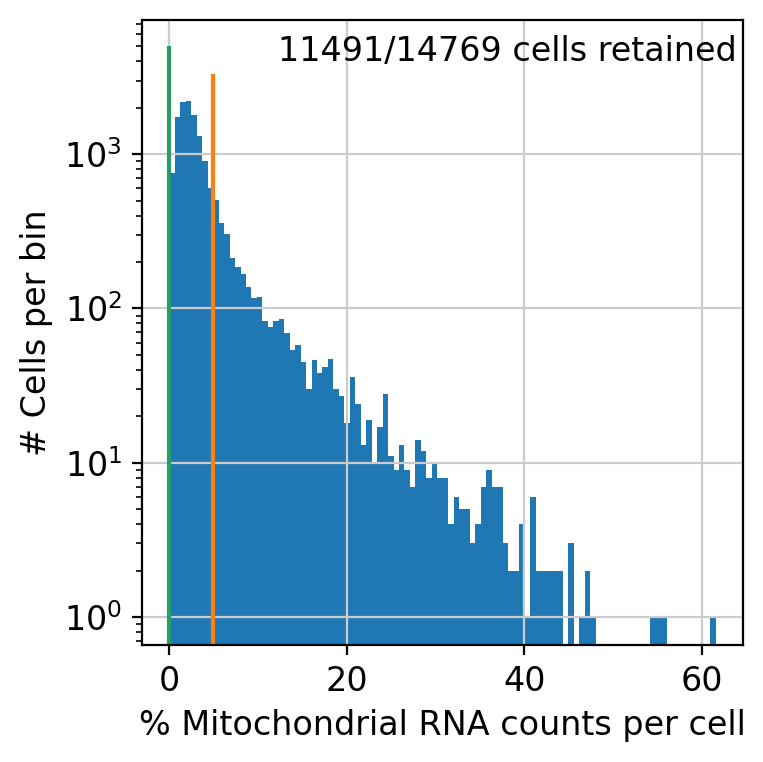

Mito-Filtering  (11491/14769 cells retained)



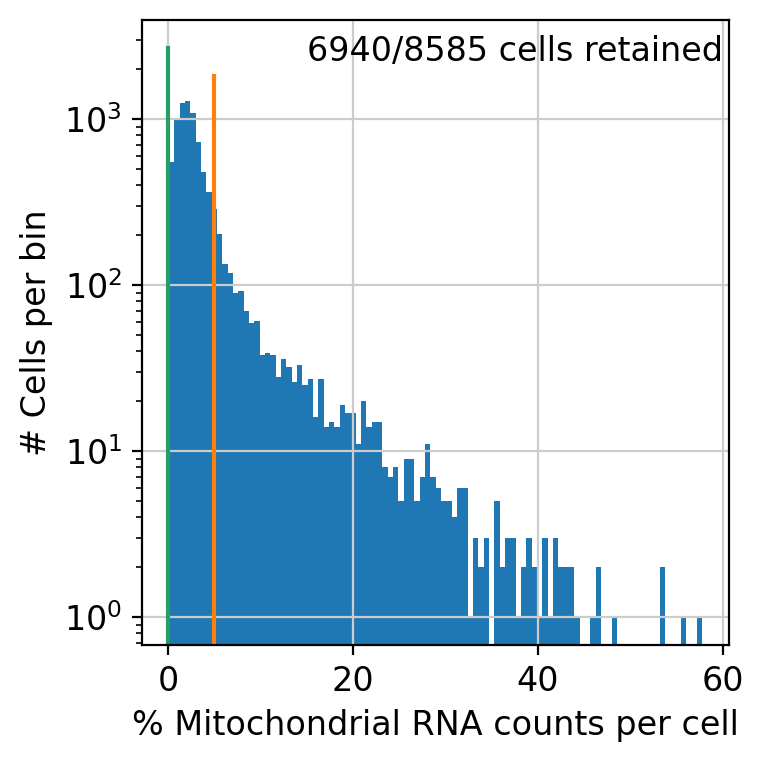

Mito-Filtering  (6940/8585 cells retained)



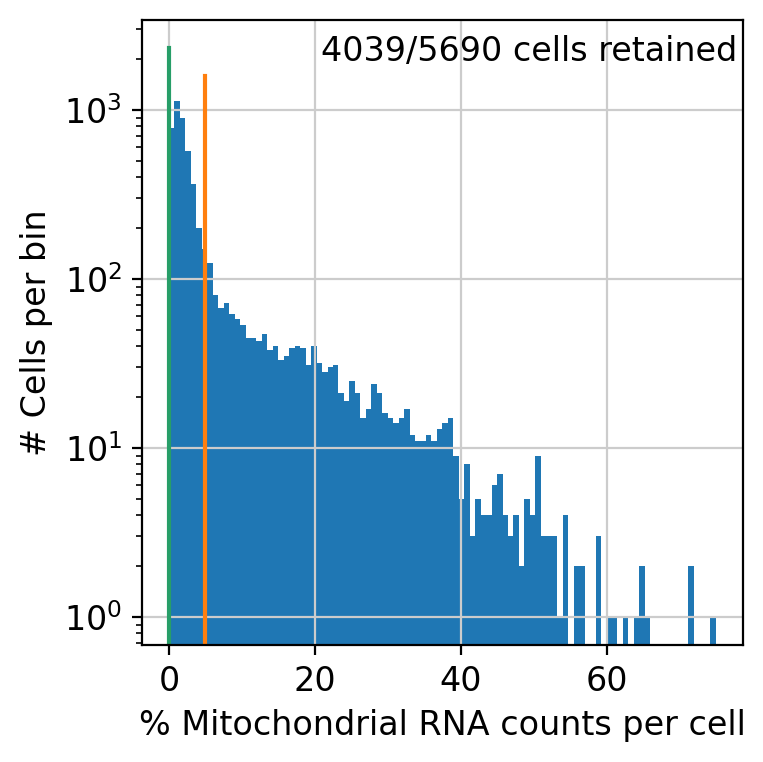

Mito-Filtering  (4039/5690 cells retained)



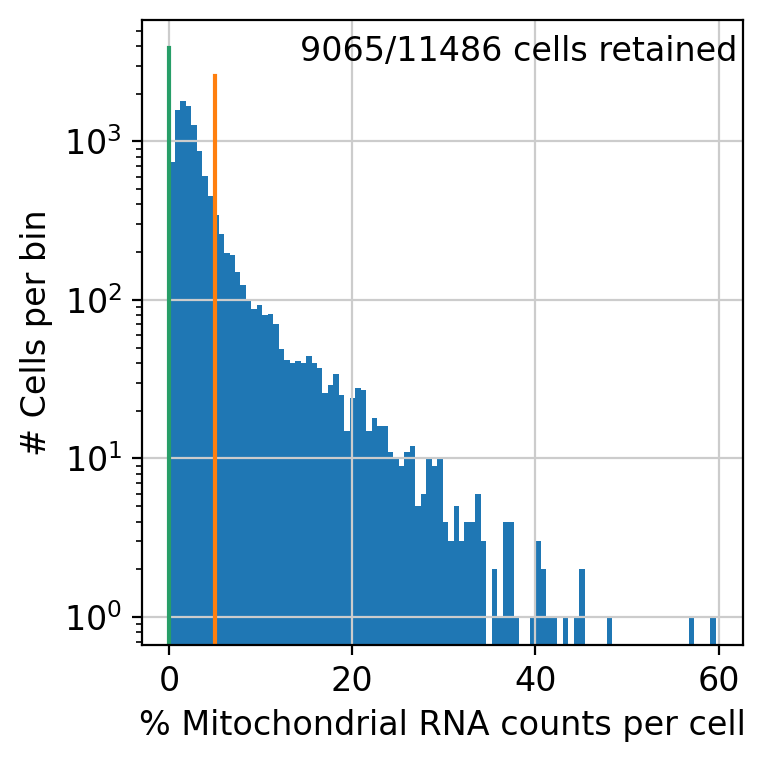

Mito-Filtering  (9065/11486 cells retained)



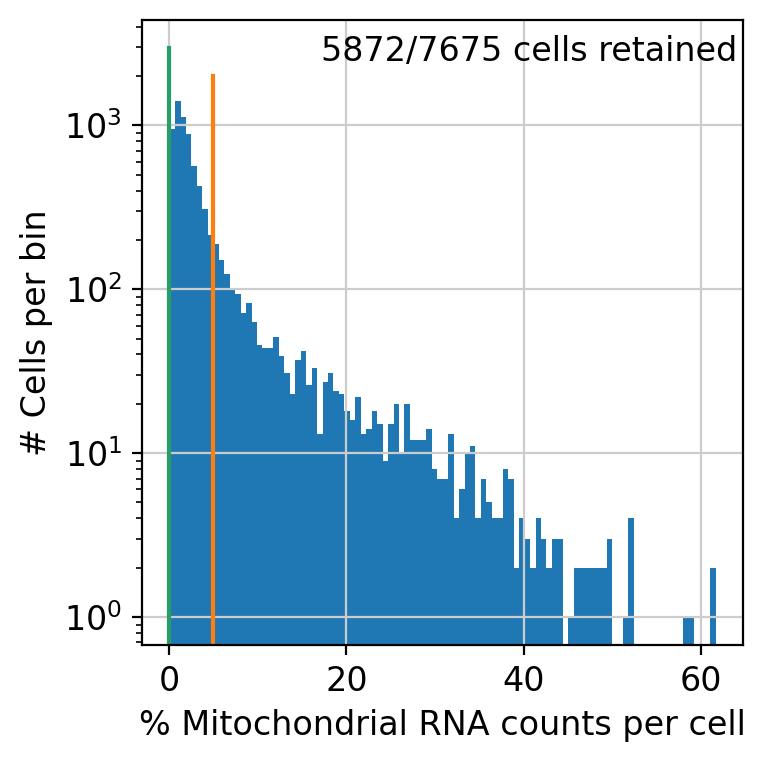

Mito-Filtering  (5872/7675 cells retained)



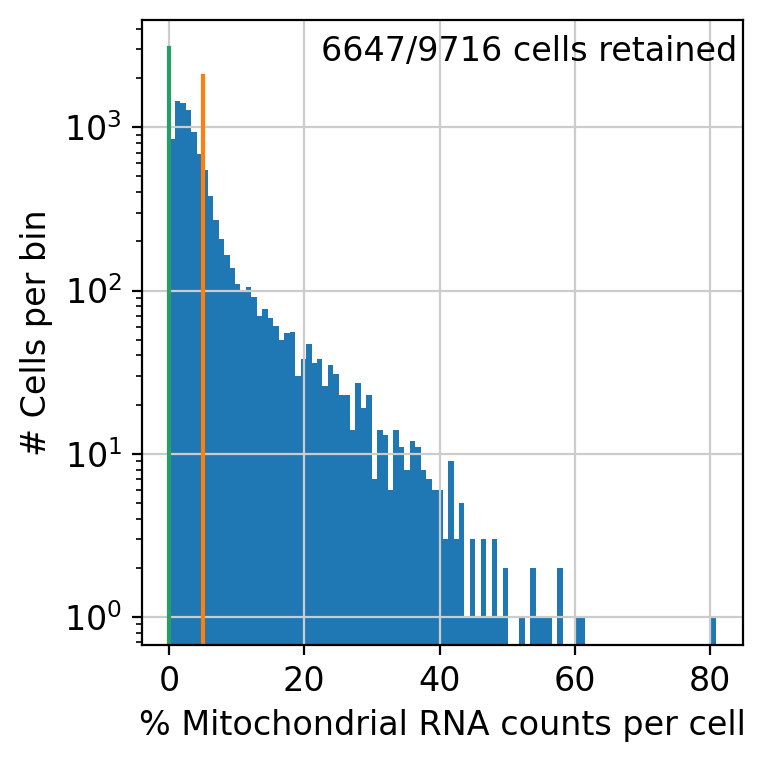

Mito-Filtering  (6647/9716 cells retained)



In [ ]:
mito_upper_threshold = 5
mito_filter_flag = True

for n, lib in enumerate(library_ids):
  adata_dict[lib] = dew.filter_mito(adata_dict[lib], filter_cells=mito_filter_flag, upper_threshold=mito_upper_threshold)

### Perform Cell Doublet Filtering

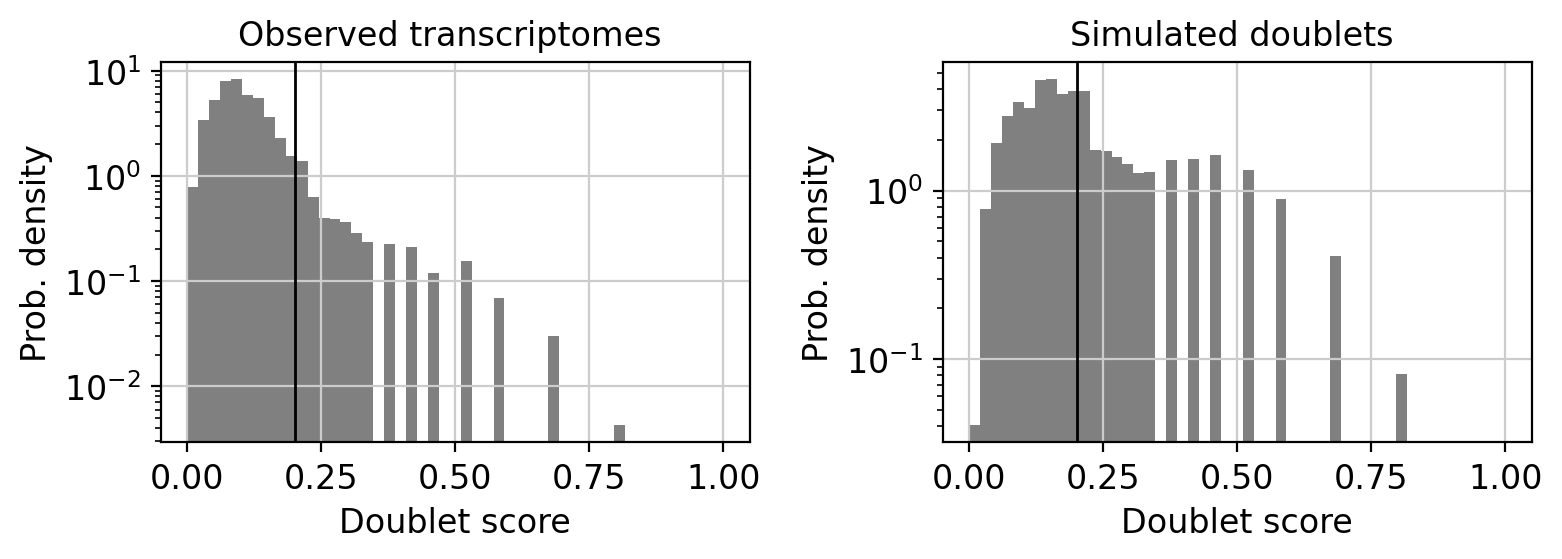

Doublet Filtering  (10437/11491 cells retained)



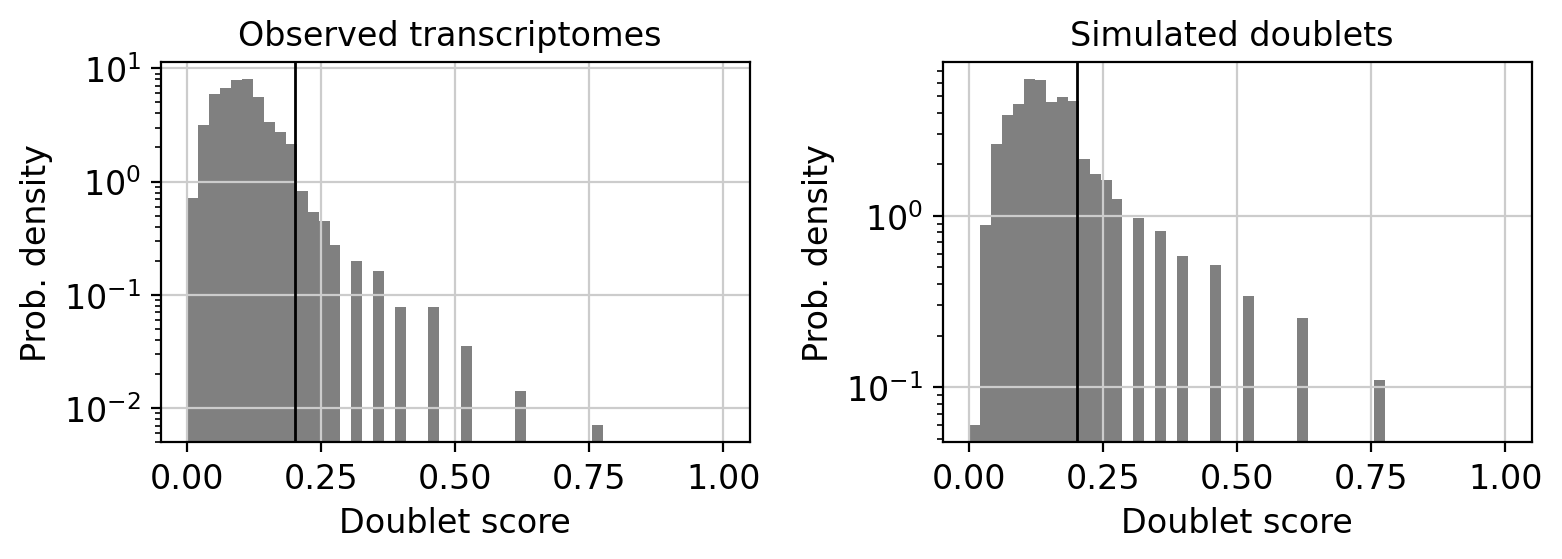

Doublet Filtering  (6427/6940 cells retained)



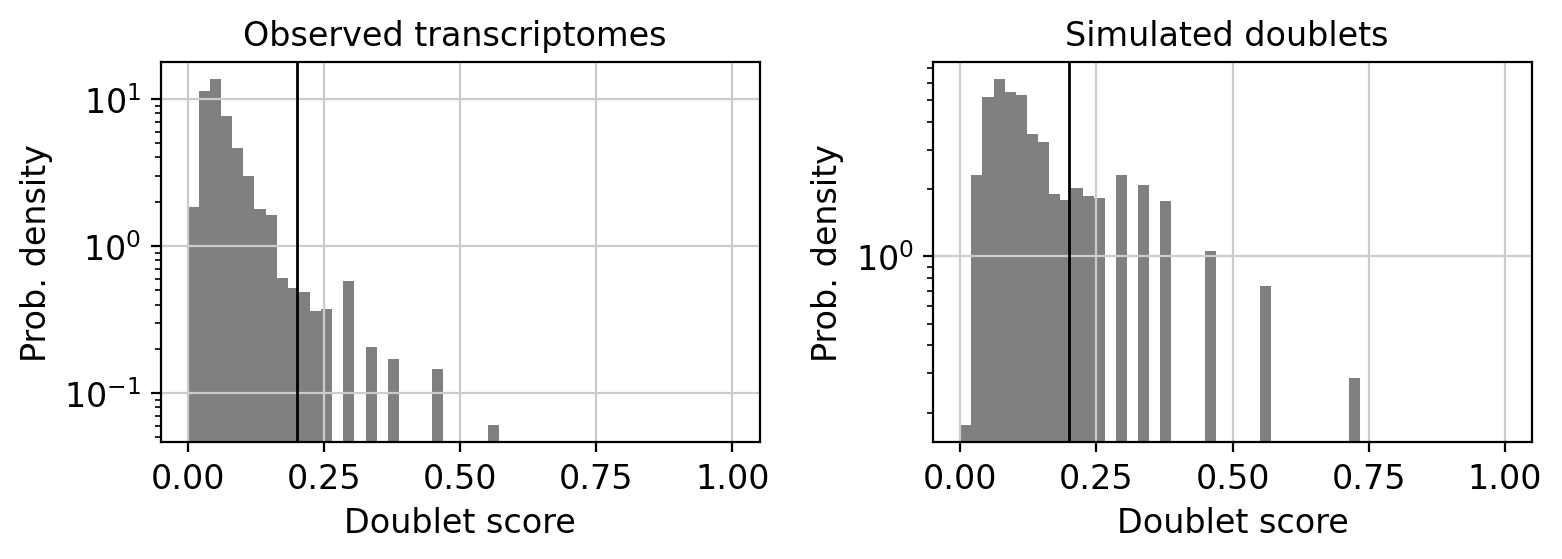

Doublet Filtering  (3842/4039 cells retained)



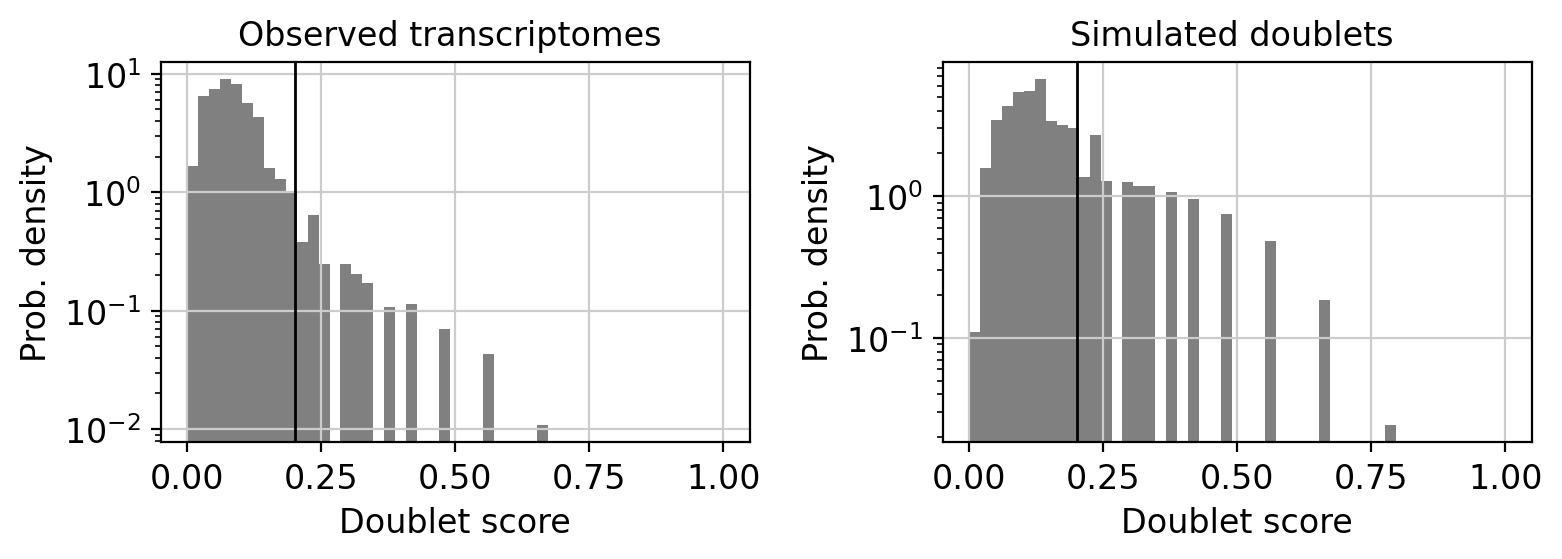

Doublet Filtering  (8650/9065 cells retained)



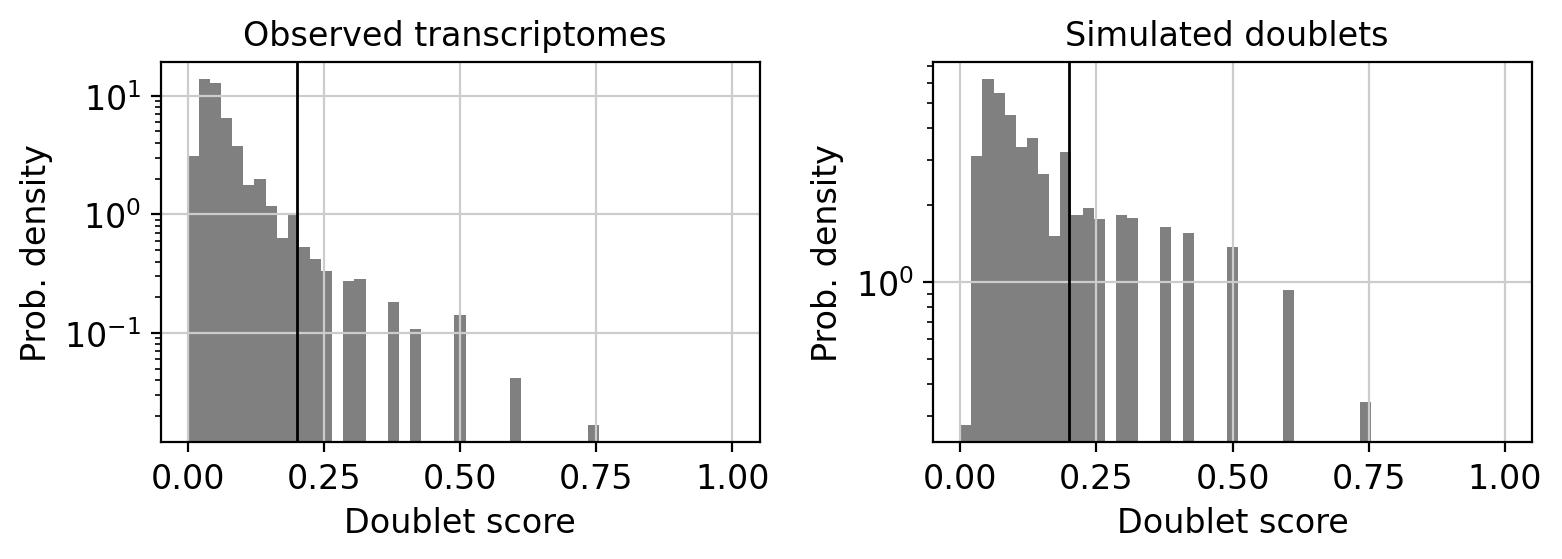

Doublet Filtering  (5532/5872 cells retained)



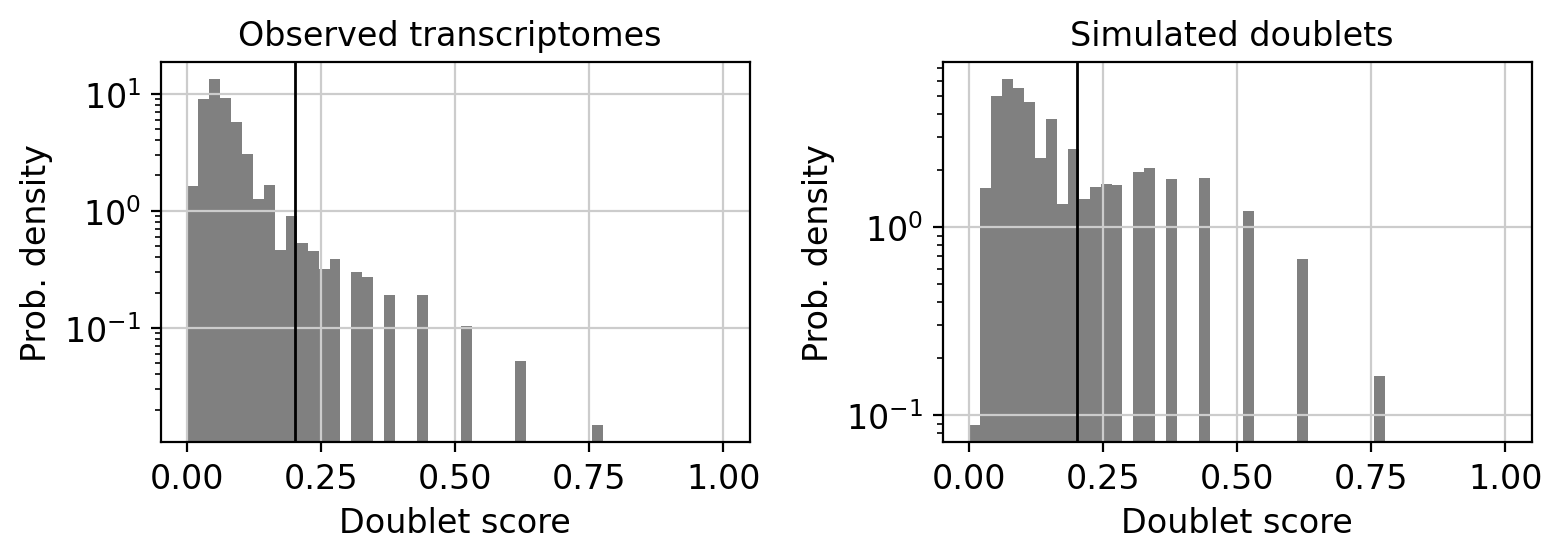

Doublet Filtering  (6266/6647 cells retained)



In [ ]:
scrub_threshold = 0.20
scrub_filter_flag = True

for n, lib in enumerate(library_ids):
  adata_dict[lib] = dew.filter_scrublet(adata_dict[lib], threshold=scrub_threshold, filter_cells=scrub_filter_flag)

## Merge Libraries


In [ ]:
if 'adata' in globals(): del adata
adata = adata_dict['FB1'].concatenate(adata_dict['FB2'],
                                      adata_dict['FB3'],
                                      adata_dict['IVF1'],
                                      adata_dict['IVF2'],
                                      adata_dict['IVF3'])

print('\n', adata)


 AnnData object with n_obs × n_vars = 41154 × 32285
    obs: 'library_id', 'total_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'doublet_score', 'predicted_doublet', 'batch'
    var: 'gene_ids', 'feature_types', 'mito', 'ribo', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2', 'n_cells_by_counts-3', 'mean_counts-3', 'log1p_mean_counts-3', 'pct_dropo

## Save Quality-Filtered Raw Counts h5ad


In [ ]:
adata.write('RinaudoMaltepe2023_raw.h5ad', compression='gzip')